In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


iris = datasets.load_iris()

iris_data= np.array(iris['data'])
iris_data_header = np.array(iris['feature_names'])
iris_target = np.array(iris['target'])
iris_target_key = np.array(iris['target_names'])
iris_target_names= iris_target_key[iris_target]
iris_target_header = np.array(['species index'])


iris_full_data = np.column_stack((iris_data,iris_target_names))
iris_full_headers = np.append(iris_data_header,iris_target_header)

iris_df = pd.DataFrame(iris_full_data, columns=iris_full_headers)
#iris_full = np.hstack((iris_data,iris_target.T))

data = { "weight": [4.17, 5.58, 5.18, 6.11, 4.50, 4.61, 5.17, 4.53, 5.33, 5.14, 4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69, 6.31, 5.12, 5.54, 5.50, 5.37, 5.29, 4.92, 6.15, 5.80, 5.26], "group": ["ctrl"] * 10 + ["trt1"] * 10 + ["trt2"] * 10}
PlantGrowth = pd.DataFrame(data)



1a. Make a histogram of the variable Sepal.Width

<Axes: xlabel='sepal width (cm)', ylabel='Count'>

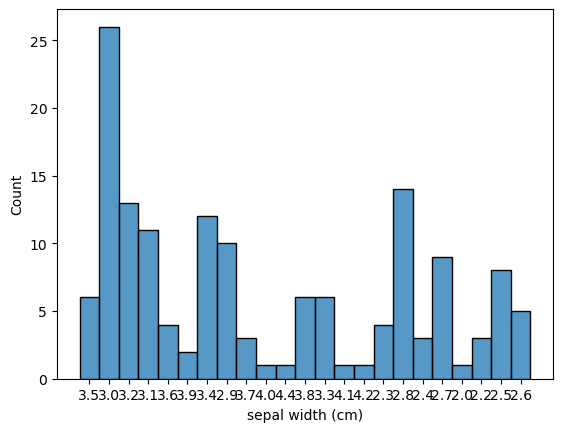

In [255]:
sns.histplot(data=iris_df['sepal width (cm)'], bins=5)


1b. Based on the histogram from 1a. which would you expect to be higher, the mean or the median? Why?

Answer: I would expect the median to be higher as this histogram appears to have more values on the left than the right

1c. Confirm my answer to 1b by finding these values 

(I was wrong - the higher values on the right side pull the mean up higher than the median)

In [242]:
iris_df['sepal width (cm)'].describe()

# alternate methods 
# iris_df['sepal width (cm)'].mean()
# iris_df['sepal width (cm)'].median()

count     150
unique     23
top       3.0
freq       26
Name: sepal width (cm), dtype: object

1d. Only 27% of the flowers have a Sepal Width higher than _____ cm.

In [243]:
print(f'Only 27% of the flowers have a Sepal Width higher than {iris_df['sepal width (cm)'].quantile(.73)} cm.')

# alternate method
"""
sw_73_qt = iris_df['sepal width (cm)'].quantile(.73)

print(f'Only 27% of the flowers have a Sepal Width higher than {sw_73_qt} cm.')
"""


TypeError: unsupported operand type(s) for -: 'str' and 'str'

1e. Make scatterplots of each pair of the numerical values in iris

In [ ]:


#sns.pairplot(iris_df, hue='species index', palette='dark')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

1f. Based on 1e. which two variables appear to have the strongest relationship? And which two appear to have the weakest relationship?

The strongest relationship appears to be between Petal Width and Petal Length due to the almost linear relationship.
The weakest relationship appears to be between Sepal Width and Sepal Length due to there being almost no distinguishable pattern in the data. 


2a. Make a histogram of the variable weight with breakpoints (bin edges) at every 0.3 units, starting at 3.3

<Axes: xlabel='Weight', ylabel='Count'>

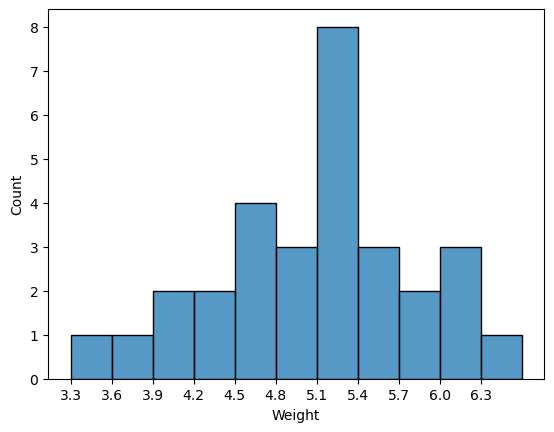

In [ ]:
ax_hist = sns.histplot(PlantGrowth['weight'], binwidth=(.3), binrange=(3.3,6.6))
ax_hist.set_xticks(np.arange(3.3,6.6,.3))
ax_hist.set_xlabel('Weight')
ax_hist

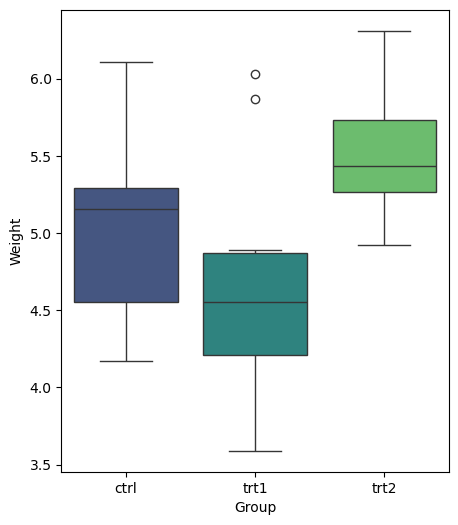

"fig, bplots = plt.subplots(figsize=(5,6))\n\nbplots.boxplot([grouping['weight'] for x, grouping in PlantGrowth.groupby('group')], patch_artist=True, labels=PlantGrowth['group'].unique())\nbplots.set(xlabel='Group',ylabel='Weight')\n\nplt.show()\n"

In [ ]:
fig, bplots = plt.subplots(figsize=(5,6))
sns.boxplot(x=PlantGrowth['group'], y=PlantGrowth['weight'], palette='viridis', hue=PlantGrowth['group'], legend=False)
bplots.set(xlabel='Group',ylabel='Weight')
plt.show()


# Alternate method for my benefit

"""
fig, bplots = plt.subplots(figsize=(5,6))

bplots.boxplot([grouping['weight'] for x, grouping in PlantGrowth.groupby('group')], patch_artist=True, labels=PlantGrowth['group'].unique())
bplots.set(xlabel='Group',ylabel='Weight')

plt.show()
"""

2c. Based on the boxplots in #2b, approximately what percentage of the "trt1" weights are below the minimum "trt2" weight?

It would appear all but two outliers of the trt1 weight values are below the minimum trt2 weight values.

2d. Find the exact percentage of the "trt1" weights that are below the minimum "trt2" weight.

In [ ]:
trt2_min = PlantGrowth['weight'][PlantGrowth['group'] == 'trt2'].min()

trt1_counter = 0
for x in PlantGrowth['weight'][(PlantGrowth['group'] == 'trt1') & (PlantGrowth['weight'] < trt2_min)]:
    trt1_counter += 1

trt1_total_count = len(PlantGrowth['weight'][PlantGrowth['group']=='trt1'].value_counts())
trt1_percentage = trt1_counter/trt1_total_count*100

print(f'The exact percentage of the trt1 weights below the minimum trt12 weight is {trt1_percentage}%')




The exact percentage of the trt1 weights below the minimum trt12 weight is 80.0%


2e. Only including plants with a weight above 5.5, make a barplot of the variable group. Make the barplot colorful using some color palette (in R, try running ?heat.colors and/or check out https://www.r-bloggers.com/palettes-in-r/).

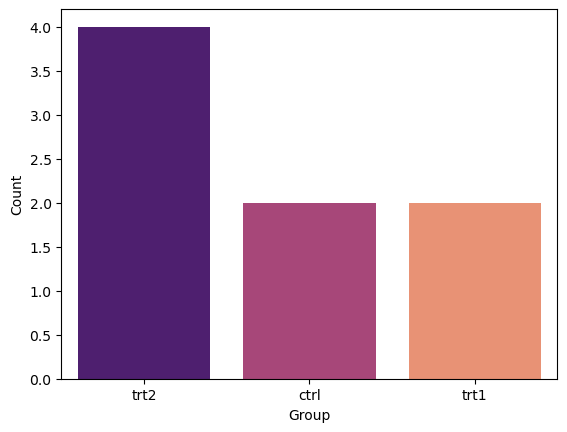

In [ ]:
min_weight = 5.5
pg_filter = PlantGrowth[PlantGrowth['weight'] > 5.5] 

pg_gr_counts = pg_filter['group'].value_counts()
pg_gr_label = pg_gr_counts.index.tolist()

pg_bplot = sns.barplot(x=pg_gr_label, y=pg_gr_counts, palette='magma', hue=pg_gr_label)
pg_bplot.set(xlabel='Group', ylabel='Count')

plt.show()